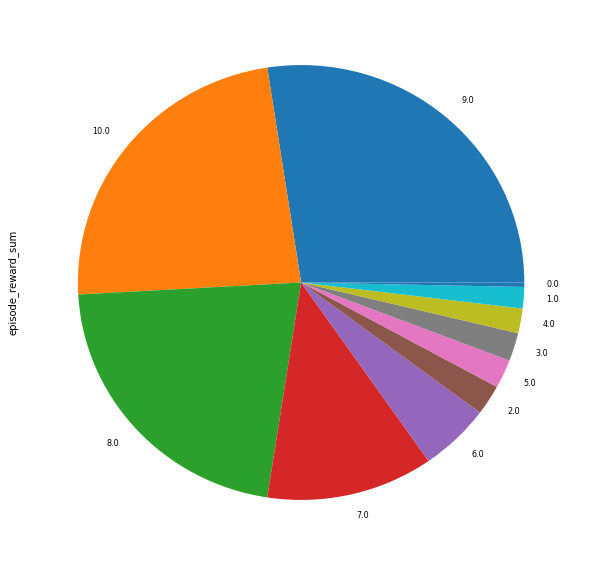

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import argparse
import numpy as np
import os,re,sys,glob,shutil
os.chdir(r'C:\Users\hosilab\Desktop\tst\agent')
#os.getcwd()
parser = argparse.ArgumentParser()
parser.add_argument('--log-file', '-l', default='orig_reward.log', type=str,
                    help='reward log file name')#orig_reward.log

args = parser.parse_args(args=[])
with open(args.log_file,'r')as f:
    title = f.readline().strip()
#title = re.sub(r'.\,.',"','",title)
title = re.sub(r'\s','',title)#这个返回的是string
title = re.split(r"[,;\. ]",title)#这个返回的是list，所以先去除空格#r"[,;\. ]"这里是含有空格的，都删掉，不然内部会出现空格
title
names = tuple(title)
names
# #names=('cycle', 'episode_reward_sum', 'original_reward', 'rotation_reward', 'episode_reward', 'end_episode_reward', 'episode_different_steps ')
df = pd.read_csv(args.log_file, delimiter='\t',names=names,skiprows=1)#)
df.head()
df.tail()
df.index# 查看行名 
df.columns#查看列名
df.dtypes# 查看数据格式
df.count()# 计数：每个特征(列)的非空数量
df['original_reward'].value_counts()
df['episode_different_steps'].unique()# 返回唯一值的数组
df['episode_different_steps'].unique().mean()#平均
df['episode_different_steps'].value_counts()
# df.describe()
# df['episode_different_steps'].describe()
y=df['episode_reward_sum'].value_counts()
y.plot(kind='pie',figsize=(10,10),grid=True,fontsize=8)
plt.show()

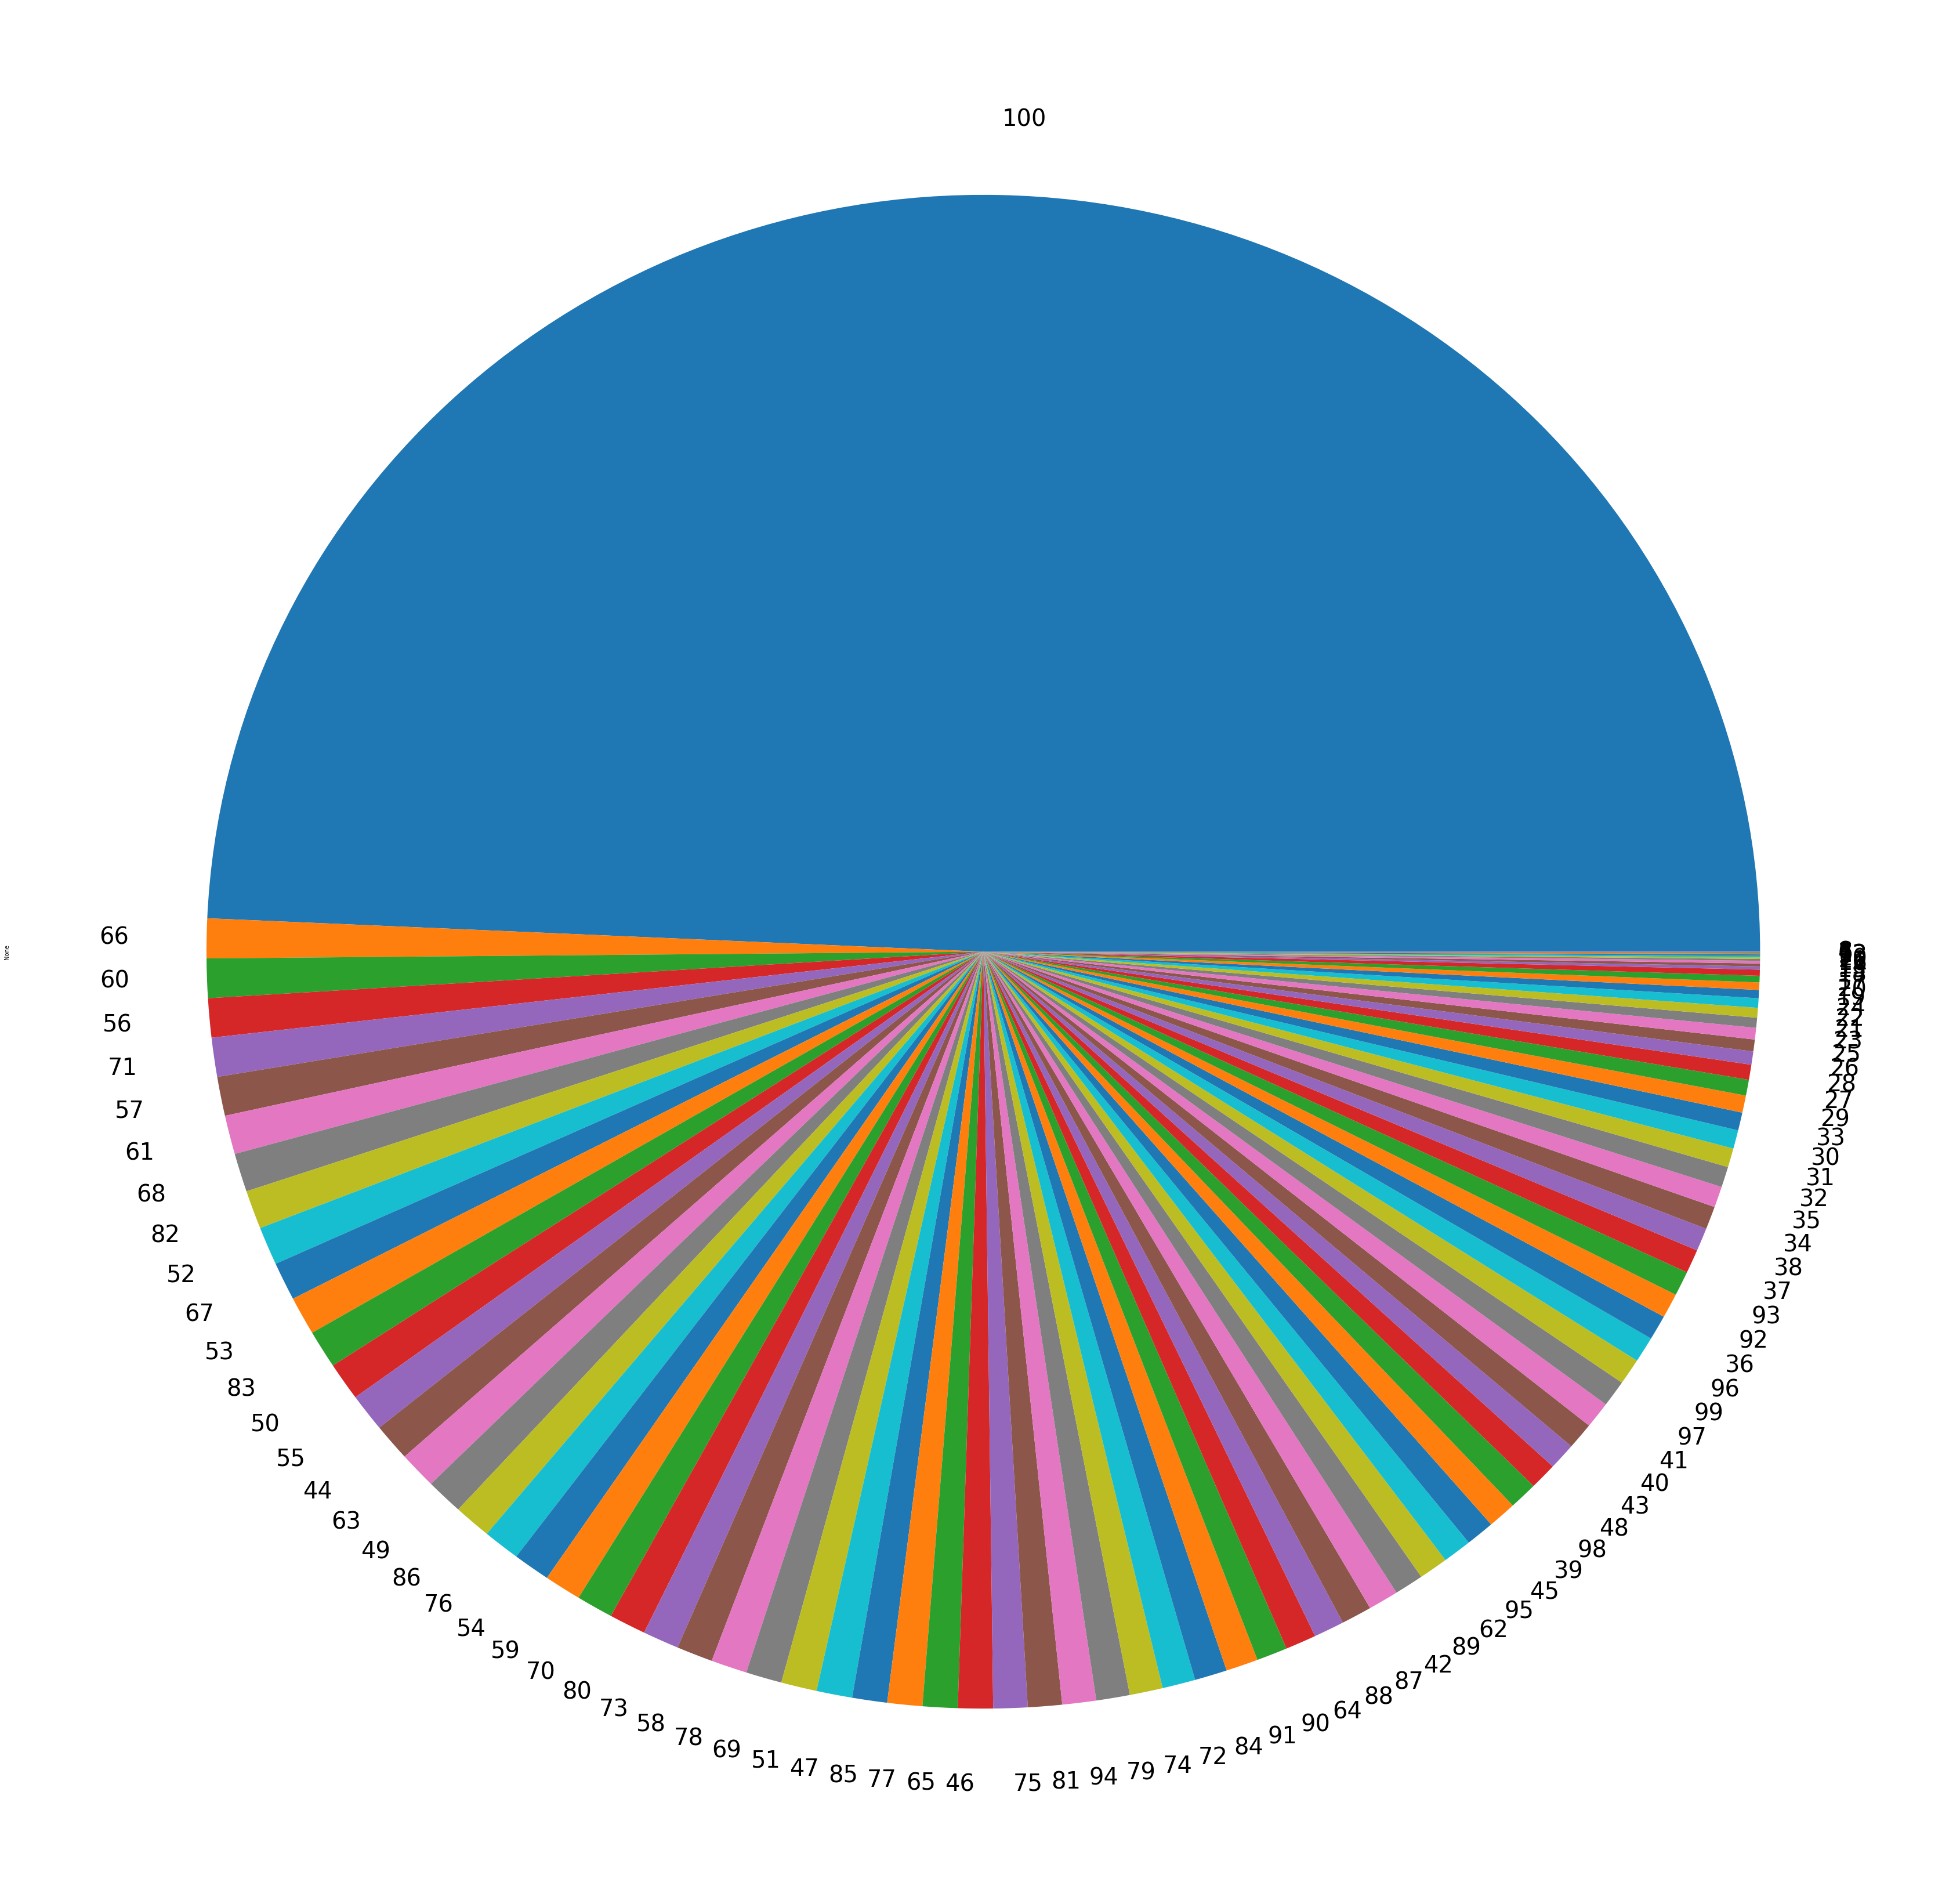

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame,Series
import argparse
import numpy as np
import os,re,sys,glob,shutil
os.chdir(r'C:\Users\hosilab\Desktop\tst\agent')
#os.getcwd()
parser = argparse.ArgumentParser()
parser.add_argument('--log-file', '-l', default='distantreward.log', type=str,
                    help='reward log file name')#orig_reward.log

args = parser.parse_args(args=[])
with open(args.log_file,'r')as f:
    title = f.readline().strip()
#title = re.sub(r'.\,.',"','",title)
title = re.sub(r'\s','',title)#这个返回的是string
title = re.split(r"[,;\. ]",title)#这个返回的是list，所以先去除空格#r"[,;\. ]"这里是含有空格的，都删掉，不然内部会出现空格
title
names = tuple(title)
names
# # #('cycle', 'episode_reward_sum')
df = pd.read_csv(args.log_file, delimiter=',',names=names)#)
# df.head()
# df.tail()
# df.index# 查看行名 
# df.columns#查看列名
# df.dtypes# 查看数据格式
# df.count()# 计数：每个特征(列)的非空数量
# df['original_reward'].value_counts()
df.columns
# # df.describe()
y = np.asarray(df['cycle'],dtype=np.int32)
y = np.diff(y)[1:]
y = Series(y)
y = y.value_counts()
# # # y=df['episode_different_steps'].value_counts()
y.plot(kind='pie',figsize=(60,60),grid=True,fontsize=40)
plt.show()

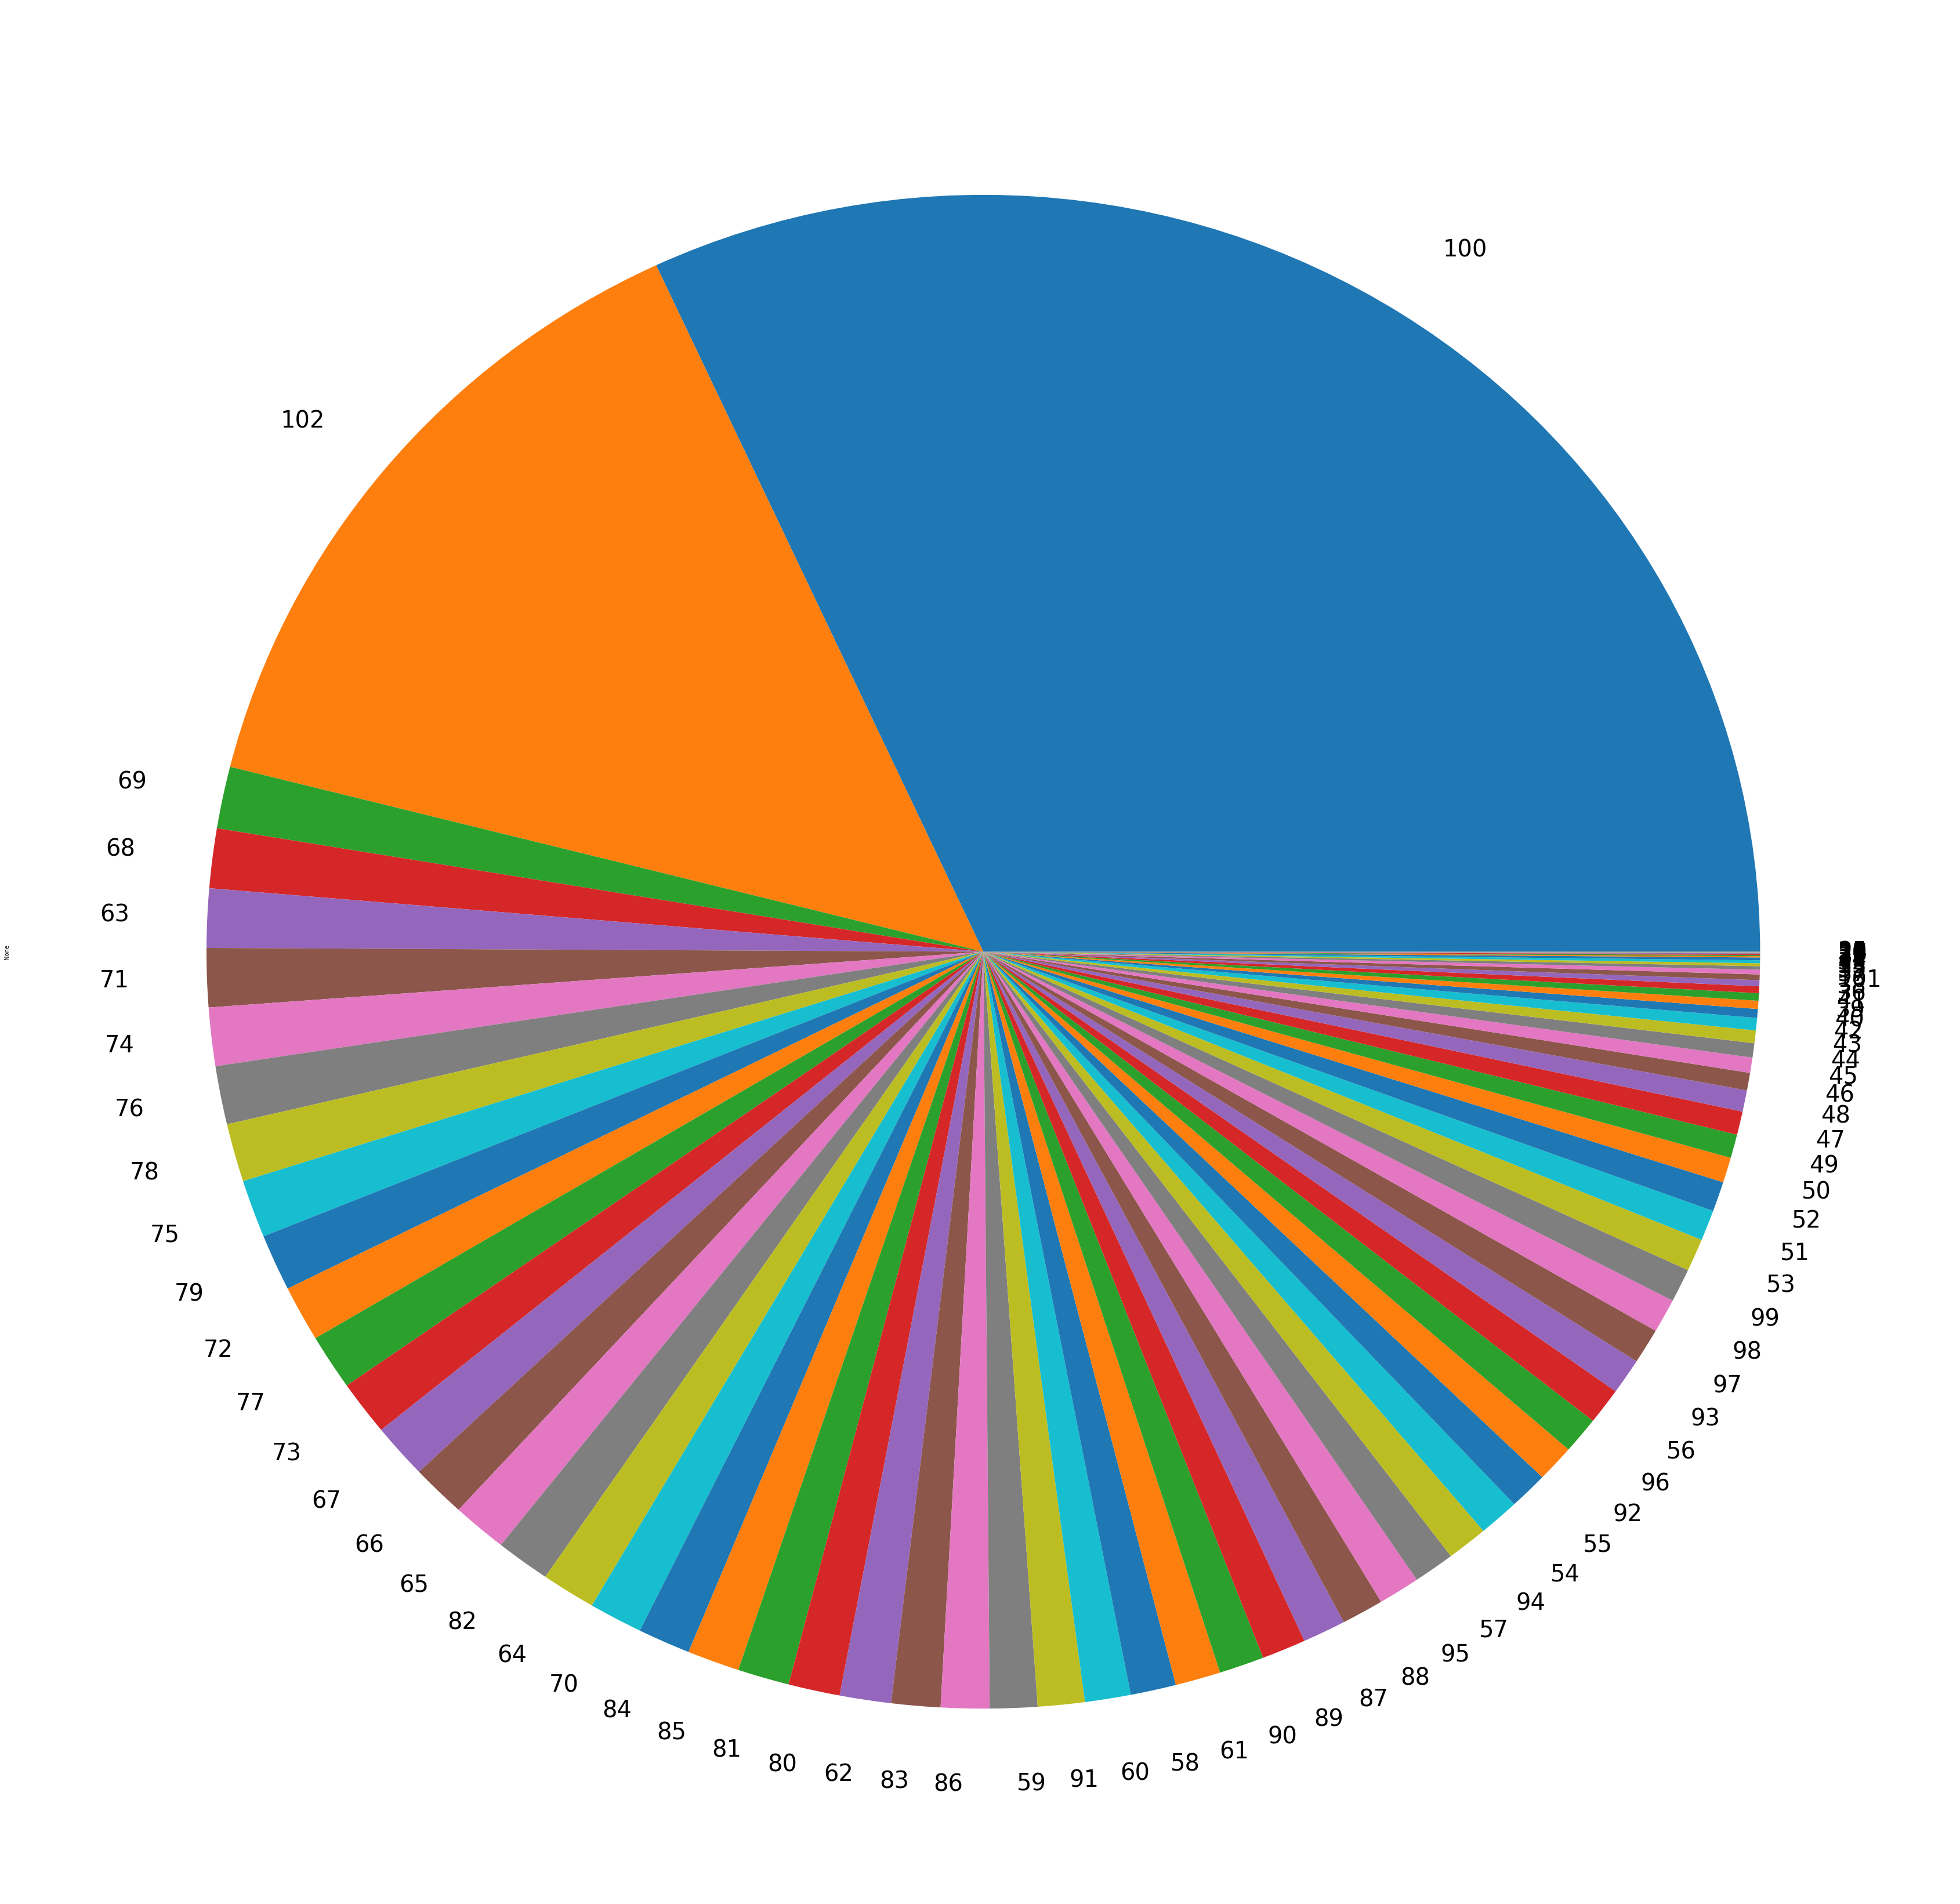

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame,Series
import argparse
import numpy as np
import os,re,sys,glob,shutil
os.chdir(r'C:\Users\hosilab\Desktop\tst\agent')
#os.getcwd()
parser = argparse.ArgumentParser()
parser.add_argument('--log-file', '-l', default='psreward.log', type=str,
                    help='reward log file name')#orig_reward.log

args = parser.parse_args(args=[])
# with open(args.log_file,'r')as f:
#     title = f.readline().strip()
# #title = re.sub(r'.\,.',"','",title)
# title = re.sub(r'\s','',title)#这个返回的是string
# title = re.split(r"[,;\. ]",title)#这个返回的是list，所以先去除空格#r"[,;\. ]"这里是含有空格的，都删掉，不然内部会出现空格
# title
# names = tuple(title)
# names
# # #('cycle', 'episode_reward_sum')
df = pd.read_csv(args.log_file, delimiter=',')#)
#df['cycle'].value_counts()
# df.head()
# df.tail()
# df.index# 查看行名 
# df.columns#查看列名
# df.dtypes# 查看数据格式
# df.count()# 计数：每个特征(列)的非空数量
# df['original_reward'].value_counts()
# df.columns
#df['cycle']

x = np.asanyarray([i for i in sorted(df[df.columns[0]])]).astype('i4')
x
diff = np.diff(x)

len(df[df.columns[0]])-len(diff)
diff = np.insert(diff,0,100)
diff = Series(diff)

# len(df[df.columns[0]])-len(diff)
# # y = np.sort(np.asarray(df['cycle'],dtype=np.int32))
# # y = np.diff(y)
# # y
# y = DataFrame(y)
# # y
y = diff.value_counts()
# y
# # # # # y=df['episode_different_steps'].value_counts()
y.plot(kind='pie',figsize=(60,60),grid=True,fontsize=40)
plt.show()